In [1]:
import numpy as np
import matplotlib.pyplot as plt
from xarm.wrapper import XArmAPI

SDK_VERSION: 1.13.30


# Machine Setup

### Connecting To Arm

In [2]:
arm = XArmAPI('192.168.1.205') #Arm is named arm

ROBOT_IP: 192.168.1.205, VERSION: v2.2.2, PROTOCOL: V1, DETAIL: 6,6,XI1304,AC1303,v2.2.2, TYPE1300: [1, 1]
change protocol identifier to 3


### Enabling Arm (If you're feeling safe, clear a 762 mm radius circle around robot)

In [5]:
arm.motion_enable(enable=True)
arm.set_mode(0)
arm.set_state(state=0)

[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


0

In [4]:
arm.motion_enable(enable=False)

0

### Define Pen Diameter (used for tool offset)

In [6]:
pendia = 8 #mm

### Robot Offset and Tool Offset

In [7]:
# Setting offsets for the coordinate system
arm.set_world_offset([-260,0,8,0,0,0]) #accounting for 8 mm thick base arm is mounted to
arm.set_tcp_offset([42.75 + np.sqrt(2)*(pendia/2), 0, 97, 0, 0, 0]) #pen tip position relative to center of mount
arm.set_state(state=0)

[set_state], xArm is ready to move


0

In [8]:
arm.get_position() # just returns the coordinates

(0, [-8.051095, -0.442698, 23.38154, 179.994634, 0.389783, -0.013178])

### Inserting Pen

#### Step 1: Remove any other pens

#### Step 2: Move robot to ready position

In [17]:
arm.set_position(x = 0, y = 0, z = 0.5, roll = 180, pitch = 0, yaw = 0, speed = 20, wait = True)

0

In [16]:
arm.get_position()

(0, [0.999948, 9e-06, 14.999941, 179.999963, -0.0, 0.0])

#### Step 3: Insert pen with tip touching paper

#### Step 4: Move arm up

In [18]:
arm.set_position(z = 10, speed = 5, wait = True)

0

In [23]:
zdraw = 0
zmove = 5
movespeed = 80
drawspeed = 30

In [24]:
moves = np.genfromtxt('commands.csv', delimiter=',')
positions = np.array([[0,0,zmove,movespeed]])
for move in moves:
    if move[0] == 0:
        positions = np.append(positions,[[move[2],move[1],zmove,movespeed]], axis = 0)
        positions = np.append(positions,[[move[2],move[1],zdraw,drawspeed]], axis = 0)
    elif move[0] == 1:
        positions = np.append(positions,[[move[2],move[1],zdraw,drawspeed]], axis = 0)
    elif move[0] == 2:
        positions = np.append(positions,[[move[2],move[1],zdraw,drawspeed]], axis = 0)
        positions = np.append(positions,[[move[2],move[1],zmove,drawspeed]], axis = 0)
    else:
        print('uh oh')

In [25]:
for coords in positions:
    arm.set_position(*coords[0:3], speed = coords[3], radius = -1, wait=True)

In [29]:
!vpype text --position 0mm 400mm -s 10mm "Idk?" gwrite -p csv test.csv show

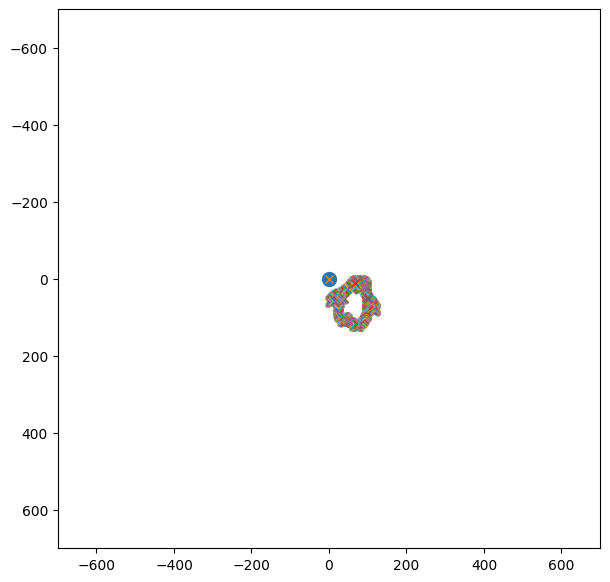

In [163]:
fig1 = plt.figure(figsize=(7,7))
plt.xlim(-700,700)
plt.ylim(700,-700)
plt.plot(0,0, marker='o', markersize = 10)
for coords in positions:
    plt.plot(coords[1], coords[0], marker = 'x')

In [36]:
!vpype text --position 0mm 400mm -s 10mm "Idk?" gwrite -p csv test.csv show

In [41]:
for coords in positions:
    arm.set_position(*coords[0:3], speed = coords[3], radius = -1, wait=True)

In [29]:
!vpype read -q 1mm penguin.svg scale -o 0mm 0mm 2 2 gwrite -p csv penguin.csv

In [48]:
!vpype text --position 0mm 400mm -s 300mm "test" show

In [51]:
!vpype rect 10mm 10mm 5mm 6mm show

In [59]:
!vpype circle -q 0.1mm 10mm 10mm 5mm show

In [67]:
!vpype rect 0mm 0mm 22mm 10mm text --position 0mm 5mm -s 10mm "hello" show

In [69]:
!vpype grid circle 0mm 0mm 15mm show

Usage: vpype [OPTIONS] COMMAND1 [ARGS]... [COMMAND2 [ARGS]...]...

Error: No such command '0mm'.


In [72]:
!vpype begin grid -o 2cm 2cm 2 2 circle 0mm 0mm 15mm end show

In [52]:
arm.get_position()

(0, [21.219503, 91.545883, 4.999937, 179.999963, -0.004354, -0.0])

In [53]:
arm.set_position(z = 50, speed = 5, wait = True)

0

In [58]:
arm.set_position(x= 200, z = 300, pitch = -60, speed = 20, wait = True)

0

In [63]:
arm.get_servo_angle()

(0, [-0.188274, -11.254896, 0.552618, 0.407889, 10.716202, -0.454012, 0.0])

In [85]:
!vpype rect 0mm 0mm 10mm 10mm gwrite -p csv square.csv